In [78]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

- [**Popularity Based Filtering**](https://medium.com/the-owl/recommender-systems-f62ad843f70c)
- [**Kaggle Dataset**](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)
  


In [79]:
books = pd.read_csv(r"Datasets/Books.csv")
ratings = pd.read_csv(r"Datasets/Ratings.csv") 

C:\Users\Computec\AppData\Local\Temp\ipykernel_28356\4125836155.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r"Datasets/Books.csv")


In [80]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [81]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### EDA

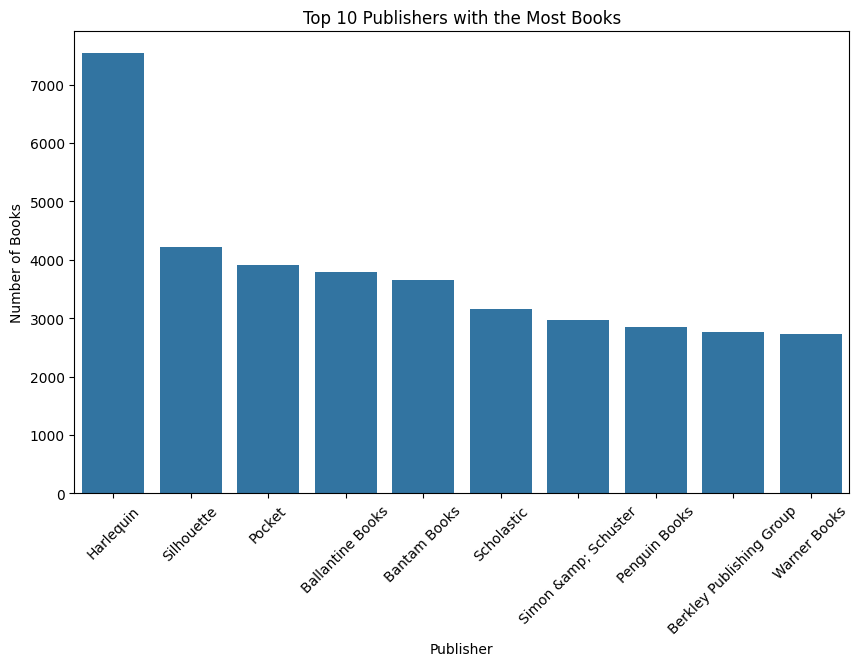

In [82]:
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Publisher",y="count",data=pd.DataFrame(top_publishers))
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

### Merge Both Datasets

In [83]:
df = pd.merge(books,ratings,on="ISBN",how="left")
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


### Data Cleaning

In [84]:
df.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication       0
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               4
User-ID                1209
Book-Rating            1209
dtype: int64

In [85]:
df.dropna()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


In [86]:
len(np.unique(df["Book-Title"]))

242135

## **Popularity Base Recommendation System**
To implement a popularity-based recommendation system using the dataset you provided, the idea is to recommend the most popular books based on the number of ratings or the average rating score. Here’s how you can do this:

- Step 1: Group the dataset by Book-Title and calculate the average rating and the number of ratings for each book.

- Step 2: Sort the books based on either the average rating or the number of ratings (whichever you define as "popularity").

- Step 3: Recommend books that have the highest popularity score.

In [87]:
book_ratings = df.groupby('Book-Title').agg({'Book-Rating': ['mean', 'count']}).reset_index()
book_ratings

Book-Title Book-Rating      
                                                                 mean count
0        A Light in the Storm: The Civil War Diary of ...    2.250000     4
1                                   Always Have Popsicles    0.000000     1
2                    Apple Magic (The Collector's series)    0.000000     1
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000     1
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000     1
...                                                   ...         ...   ...
242130                                      Ã?Â?lpiraten.    0.000000     2
242131                     Ã?Â?rger mit Produkt X. Roman.    5.250000     4
242132                                Ã?Â?sterlich leben.    7.000000     1
242133                              Ã?Â?stlich der Berge.    2.666667     3
242134                                  Ã?Â?thique en toc    4.000000     2

[242135 rows x 3 columns]

### Step 1: Calculate average ratings and the number of ratings

In [88]:
book_ratings = df.groupby("Book-Title")["Book-Rating"].agg(mean="mean", count="count").reset_index()

### Step 2: Sort the books based on the count of ratings (popularity) or average rating

In [89]:
book_ratings.sort_values(by=["mean","count"],ascending=False)

,Book-Title,mean,count
196930,The Lord of the Rings (Leatherette Collector's...,10.0,6
52514,Dinosaurs: A Celebration,10.0,5
67964,Flame Of Recca (Flame Of Recca),10.0,5
22788,Betsy and Joe (Betsy &amp; Tacy),10.0,4
33827,Charlottes Web Special Read Along Edition,10.0,4
...,...,...,...
240917,Younger Women-Older Men,NaN,0
241316,Zagwitz,NaN,0
241356,Zauberhafter RÃ?Â¶mertopf. 300 herrliche Geric...,NaN,0
241766,Zur HÃ?Â¶lle mit den guten Sitten.,NaN,0


In [90]:
new_df = pd.merge(book_ratings,df[["Book-Title","Book-Author"]],on="Book-Title",how="left").sort_values(by=["mean","count"],ascending=False).drop_duplicates()
new_df

,Book-Title,mean,count,Book-Author
830881,The Lord of the Rings (Leatherette Collector's...,10.0,6,J. R. R. Tolkien
218802,Dinosaurs: A Celebration,10.0,5,Steve White
218803,Dinosaurs: A Celebration,10.0,5,Dan Abnett
282122,Flame Of Recca (Flame Of Recca),10.0,5,Nobuyuki Anzai
97818,Betsy and Joe (Betsy &amp; Tacy),10.0,4,Maud Hart Lovelace
...,...,...,...,...
1028310,Younger Women-Older Men,NaN,0,Beliza Ann Furman
1029366,Zagwitz,NaN,0,Inigo Jones
1029465,Zauberhafter RÃ?Â¶mertopf. 300 herrliche Geric...,NaN,0,Inge Meisnitzer
1031073,Zur HÃ?Â¶lle mit den guten Sitten.,NaN,0,Jule Brand


In [91]:
new_df.drop_duplicates(subset=["Book-Title"],inplace=True)

In [92]:
new_df

,Book-Title,mean,count,Book-Author
830881,The Lord of the Rings (Leatherette Collector's...,10.0,6,J. R. R. Tolkien
218802,Dinosaurs: A Celebration,10.0,5,Steve White
282122,Flame Of Recca (Flame Of Recca),10.0,5,Nobuyuki Anzai
97818,Betsy and Joe (Betsy &amp; Tacy),10.0,4,Maud Hart Lovelace
146485,Charlottes Web Special Read Along Edition,10.0,4,E B White
...,...,...,...,...
1028310,Younger Women-Older Men,NaN,0,Beliza Ann Furman
1029366,Zagwitz,NaN,0,Inigo Jones
1029465,Zauberhafter RÃ?Â¶mertopf. 300 herrliche Geric...,NaN,0,Inge Meisnitzer
1031073,Zur HÃ?Â¶lle mit den guten Sitten.,NaN,0,Jule Brand


Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]
where,
- v is the number of votes for the movie;
- R is the average rating of the movie; 
- m is the minimum votes required to be listed in the chart;
- C is the mean vote across the whole report.
<br>
**Now we find the values of** v,m,R,C.
</br>

In [93]:
C = new_df["mean"].mean()
m = new_df["count"].quantile(0.9)

In [94]:
def Weighted_Rating(v:float,R:float) -> float:
    return (v * R/ (v + m)) + (m * C / (v + m))

In [95]:
new_df["Weighted Rating"] = new_df.apply(lambda x:Weighted_Rating(v=x["count"],R=x["mean"]),axis=1)

## 🏅 Top 10 Book in Popularity 

In [96]:
new_df.sort_values(by="Weighted Rating",ascending=False)["Book-Title"][:10]

293941                                                 Free
151643                                    Chobits (Chobits)
733166    The Blue Day Book: A Lesson in Cheering Yourse...
244653                                            El Hobbit
202585                       Death: The High Cost of Living
724003    The Baby Book: Everything You Need to Know Abo...
934645    There's Treasure Everywhere--A Calvin and Hobb...
470732    Marching Through Culpeper : A Novel of Culpepe...
891516                            The Shrinking of Treehorn
19429                            A Letter to Mrs. Roosevelt
Name: Book-Title, dtype: object